In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import tensorflow as tf

Using TensorFlow backend.
/home/aadi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aadi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aadi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aadi/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
train_filter = ImageDataGenerator(rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, 
                                  height_shift_range = 0.1, zoom_range = 0.2, horizontal_flip = True)

test_filter = ImageDataGenerator(rescale = 1./255)

In [3]:
# batch size
n_batch = 32

# load the datasets
train_dataset = train_filter.flow_from_directory('./image/training_set', target_size = (300, 300), color_mode = 'grayscale', 
                                                batch_size = n_batch, classes = ['ROCK', 'PAPER', 'SCISSORS', 'NONE'],
                                                class_mode = 'categorical')

test_dataset = test_filter.flow_from_directory('./image/testing_set', target_size = (300, 300), color_mode = 'grayscale', 
                                                batch_size = n_batch, classes = ['ROCK', 'PAPER', 'SCISSORS', 'NONE'],
                                                class_mode = 'categorical')

Found 3997 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [4]:
# set up the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'sigmoid'))

model.summary()

# set up the optimizer
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),
]


history = model.fit_generator(
    train_dataset,
    steps_per_epoch=71,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=28,
    callbacks=callbacks_list
)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)     

KeyError: 'acc'

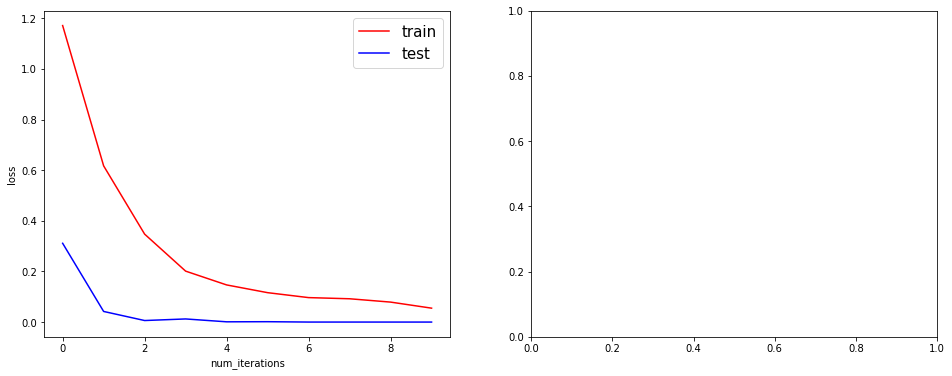

In [5]:
plt.figure(figsize = (16, 6))

# 1st plot
plt.subplot(1, 2, 1)
num_epochs = len(history.history['loss'])
plt.plot(range(num_epochs), history.history['loss'], 'r', label = "train")
plt.plot(range(num_epochs), history.history['val_loss'], 'b', label = "test")
plt.legend(prop = {'size' : 15})
plt.ylabel("loss")
plt.xlabel("num_iterations")

# 2nd plot
plt.subplot(1, 2, 2)
num_epochs = len(history.history['acc'])
plt.plot(range(num_epochs), history.history['acc'], 'r', label = "train")
plt.plot(range(num_epochs), history.history['val_acc'], 'b', label = "test")
plt.legend(prop = {'size' : 15})
plt.ylabel("accuracy")
plt.xlabel("num_iterations")